In [1]:
import pandas as pd # reading and writing CSV etc 
import numpy as np # handling mathematical functions

#Data Viz libraries
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

#Scientific Learning libraries
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score


In [2]:
df=pd.read_csv('Fish.csv')
df.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
df.isnull().values.any()

False

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
Species    159 non-null object
Weight     159 non-null float64
Length1    159 non-null float64
Length2    159 non-null float64
Length3    159 non-null float64
Height     159 non-null float64
Width      159 non-null float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [10]:
df.describe()


,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


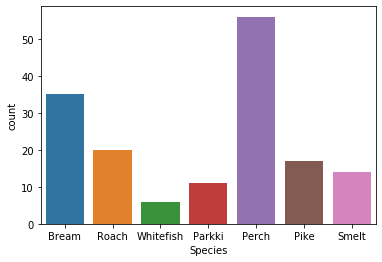

In [11]:
sns.countplot(x=df['Species']) 


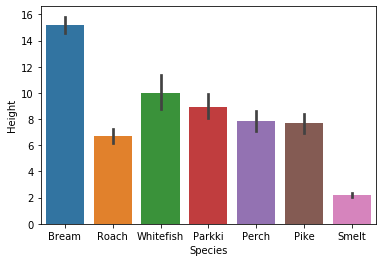

In [12]:
sns.barplot(y=df['Height'],x=df['Species']) 


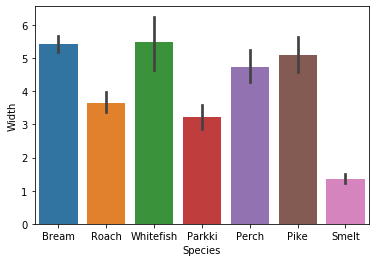

In [14]:
sns.barplot(y=df['Width'],x=df['Species']) 

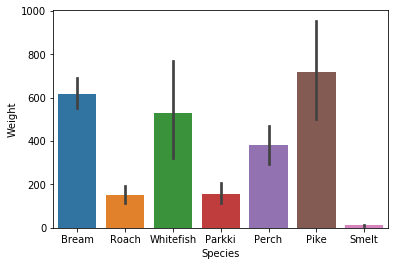

In [15]:
sns.barplot(y=df['Weight'],x=df['Species']) 

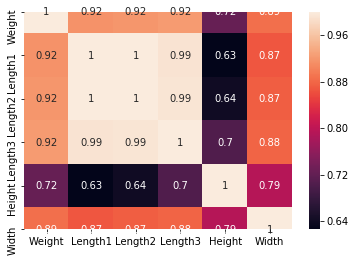

In [17]:
sns.heatmap(df.corr(),annot=True)

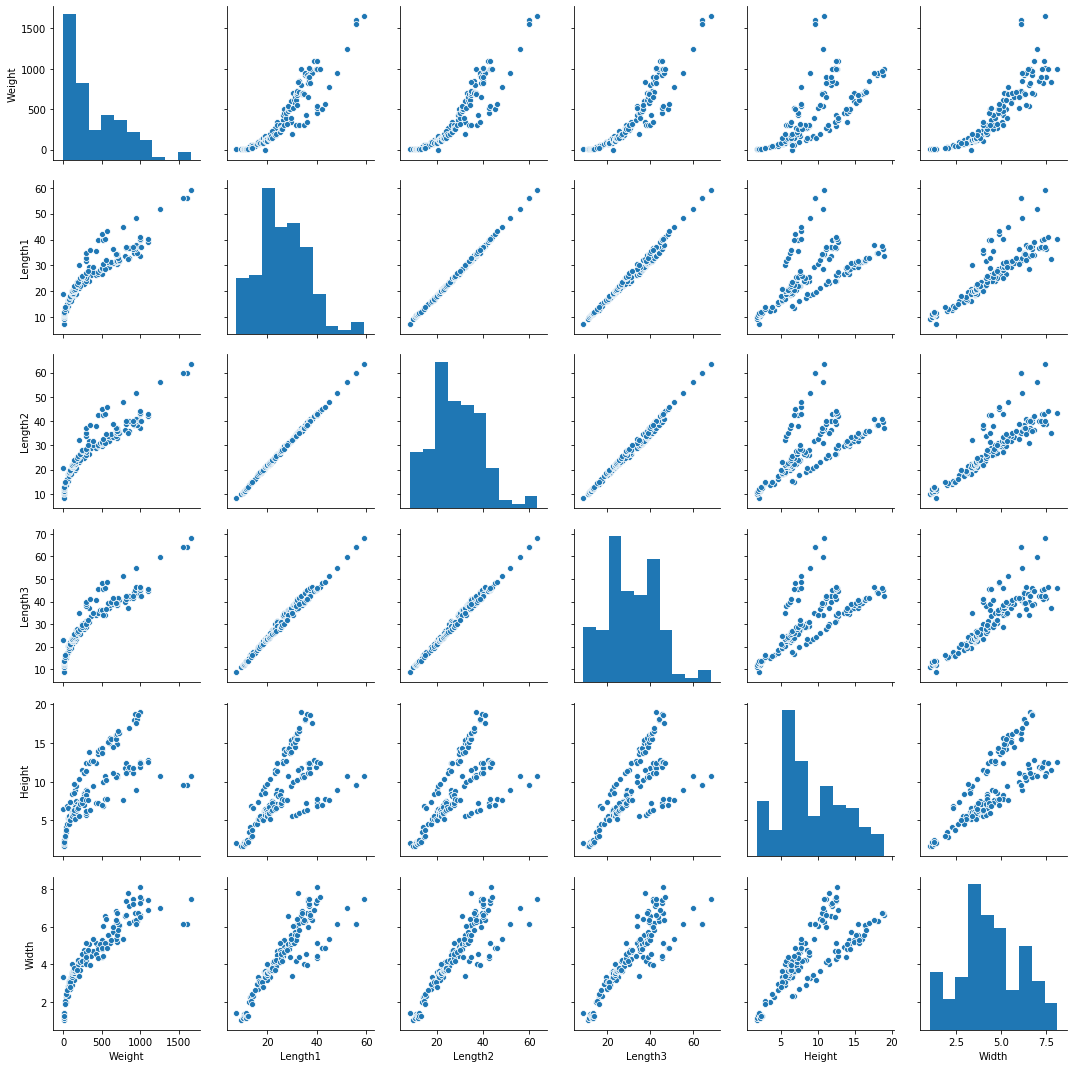

In [18]:
sns.pairplot(df) 


In [19]:
df_= df.drop('Species',axis=1)
Q1 =df_.quantile(0.25)
Q3 = df_.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


Weight     530.00000
Length1     13.65000
Length2     14.50000
Length3     16.50000
Height       6.42110
Width        2.19885
dtype: float64


In [21]:
y=df['Species']
X=df.drop(['Species'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
LR=LogisticRegression()

In [23]:
LR.fit(X_train,y_train)  #now will fit and predict


F:\anaconda_installation\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
F:\anaconda_installation\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_pred=LR.predict(X_test)


In [25]:
LR.score(X_test,y_test)


0.90625

In [27]:
data={'Actual':y_test.array,'Predicted':y_pred}



In [28]:
res=pd.DataFrame(data)


In [29]:
res

,Actual,Predicted
0,Perch,Perch
1,Smelt,Smelt
2,Pike,Pike
3,Whitefish,Perch
4,Perch,Perch
5,Bream,Bream
6,Smelt,Smelt
7,Roach,Roach
8,Perch,Perch
9,Pike,Pike


In [31]:
import joblib
filename = 'finalFishModel.sav'
joblib.dump(LR, filename)


['finalFishModel.sav']

In [32]:
df.mean()

Weight     398.326415
Length1     26.247170
Length2     28.415723
Length3     31.227044
Height       8.970994
Width        4.417486
dtype: float64